# SI 330: Data Manipulation 
## 14 - Visualization and Matplotlib II

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Outline for Today

* AWS Educate Classroom (still in progress)
  * **PLEASE ACCEPT THE INVITATION AND ENROL!**
* matplotlib and pandas


# Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
# plt.style.use("dark_background")  #for people using jupyter's dark theme

### <font color="magenta">Q1 (1 point): Using the data/menu.csv McDonald's menu dataset (from an earlier class), use ```plt.plot()``` to plot any 2 continuous variables as a scatterplot and annotate an interesting feature (e.g. local max, outlier, etc.).</font>
Use the notebook from the previous class as a reference guide.

In [2]:
menu = pd.read_csv('data/menu.csv')

In [3]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

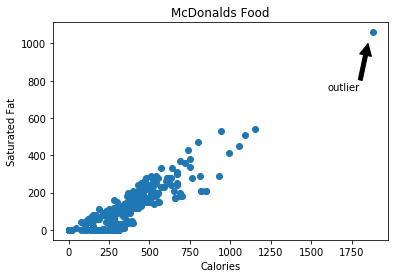

In [15]:
plt.scatter(menu["Calories"],menu["Calories from Fat"])
plt.annotate('outlier', xy=(1850, 1000), xytext=(1600, 750),
            arrowprops=dict(facecolor='black', shrink=1.0))
plt.xlabel('Calories')
plt.ylabel('Saturated Fat')
plt.title('McDonalds Food')
plt.show()

## Using specific types of plots via pyplot

In addition to scatterplots, pyplot offers a number of other plot types.  These can be accessed via convenience functions such as ```scatter()```, ```hist()```, ```bar()```, ```barh()```, and ```pie()```, amongst others:

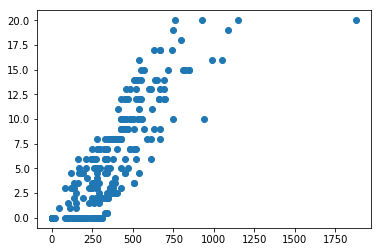

In [6]:
plt.scatter(menu["Calories"],menu["Saturated Fat"])
plt.show()

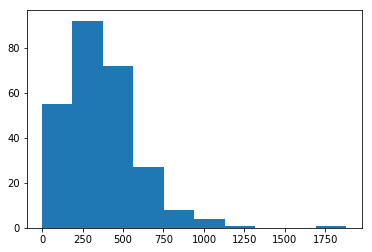

In [7]:
plt.hist(menu['Calories'])
plt.show()

### <font color="magenta">Q2 (1 point): Create a histogram of any of the continuous variables from the McDonalds menu dataset.

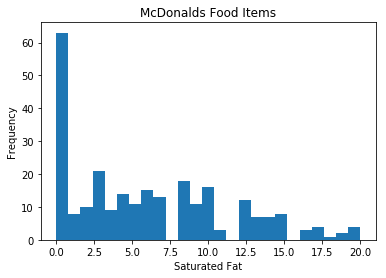

In [16]:
plt.hist(menu['Saturated Fat'], bins=25)
plt.xlabel('Saturated Fat')
plt.ylabel('Frequency')
plt.title('McDonalds Food Items')
plt.show()

## Pandas and matplotlib integration

Cumbersome?  Yes.  A better way?  Use the matplotlib integration from pandas:

matplotlib.axes._subplots.AxesSubplot

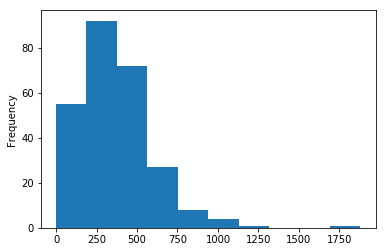

In [9]:
f = menu['Calories'].plot(kind='hist')
type(f)

Here are the valid values for "kind":

kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

## Bar plots with groupby()

In [19]:
categories = menu.groupby('Category').size()
categories

Category
Beef & Pork           15
Beverages             27
Breakfast             42
Chicken & Fish        27
Coffee & Tea          95
Desserts               7
Salads                 6
Smoothies & Shakes    28
Snacks & Sides        13
dtype: int64

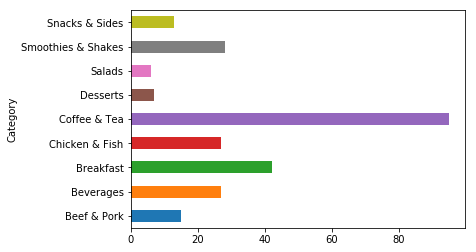

In [20]:
categories.plot(kind='barh')

In [22]:
categories_sorted = categories.sort_values(ascending=True)

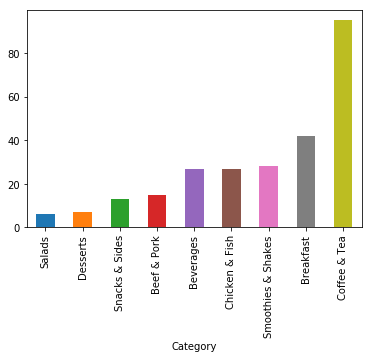

In [26]:
categories_sorted.plot(kind='bar')

### <font color="magenta">Q3 (2 points): Create a new column in the menu DataFrame called "Sugary" whose value is 1 if the values of "Sugars" is greater than 20, otherwise set it to 0. 

    Hint: use np.where(...)

In [29]:
menu['Sugary'] = np.where(menu['Sugars'] > 20, 1, 0)
menu.head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,0


In [30]:
menu[menu['Sugary'] == 1]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary
39,Breakfast,Cinnamon Melts,4 oz (114 g),460,170,19.0,30,9.0,43,0.0,...,22,3,11,32,6,4,0,6,15,1
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4.0,6,1.5,8,0.0,...,19,5,19,32,5,2,130,10,10,1
102,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,20,2.0,3,1.0,5,0.0,...,10,1,3,23,4,2,15,10,4,1
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,80,9.0,14,7.0,34,0.0,...,18,1,3,48,8,8,0,25,8,1
108,Desserts,Hot Caramel Sundae,6.4 oz (182 g),340,70,8.0,12,5.0,24,0.0,...,20,0,0,43,7,10,0,25,0,1
109,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6.0,10,4.0,20,0.0,...,16,0,0,45,6,8,4,20,0,1
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,13,0,0,39,0,0,0,0,0,1
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,18,0,0,55,0,0,0,0,0,1
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,25,0,0,76,0,0,0,0,0,1
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,9,0,0,28,0,0,0,0,0,1


## Create a stacked bar plot by using a 2-level groupby() followed by an unstack():

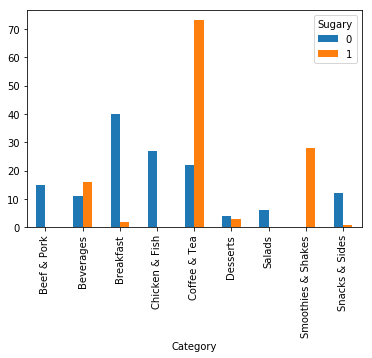

In [31]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar")

In [33]:
menu.groupby(['Category', 'Sugary']).size()

Category            Sugary
Beef & Pork         0         15
Beverages           0         11
                    1         16
Breakfast           0         40
                    1          2
Chicken & Fish      0         27
Coffee & Tea        0         22
                    1         73
Desserts            0          4
                    1          3
Salads              0          6
Smoothies & Shakes  1         28
Snacks & Sides      0         12
                    1          1
dtype: int64

In [34]:
menu.groupby(['Category', 'Sugary']).size().unstack()

Sugary,0,1
Category,,
Beef & Pork,15.0,NaN
Beverages,11.0,16.0
Breakfast,40.0,2.0
Chicken & Fish,27.0,NaN
Coffee & Tea,22.0,73.0
Desserts,4.0,3.0
Salads,6.0,NaN
Smoothies & Shakes,NaN,28.0
Snacks & Sides,12.0,1.0


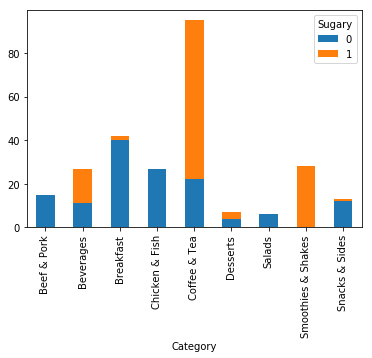

In [32]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar", stacked = True)

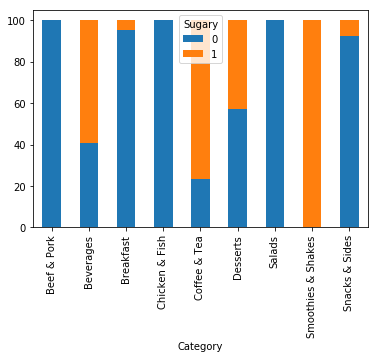

In [128]:
menu.groupby(['Category','Sugary']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

### <font color="magenta">Q4 (2 points): Repeat the above steps to generate three bar plots for any other continuous variable that you split into "high" and "low" values, just as with did with "Sugars" above.

In [35]:
menu['Cal'] = np.where(menu['Calories'] > 300, 1, 0)
menu.head(1)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary,Cal
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,0


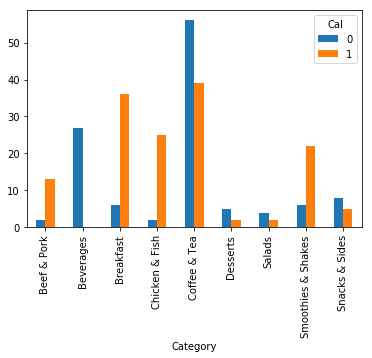

In [36]:
menu.groupby(["Category","Cal"]).size().unstack().plot(kind = "bar")

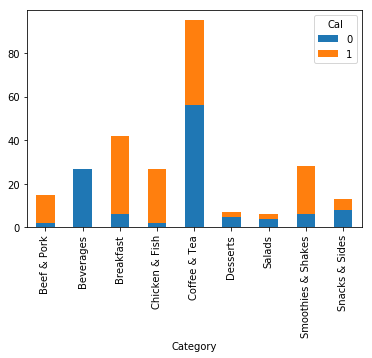

In [37]:
menu.groupby(["Category","Cal"]).size().unstack().plot(kind = "bar", stacked = True)

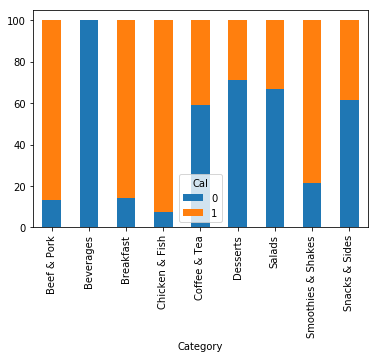

In [38]:
menu.groupby(['Category','Cal']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

### Pie Charts

There are many issues with pie charts, and the one below is a good example of what not to do, but everyone wants to know how to make them:

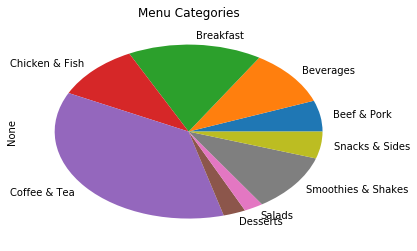

In [39]:
categories.plot(kind='pie',title='Menu Categories')

## Subplots (again)

In addition to the way we used subplots in the previous class, we can use the ```.subplots()``` function to generate mulitple plots within a figure.  ```subplots()``` returns a set of axes on which we can make plots.

To demonstrate how this works, let's fill in just one of the subplots:


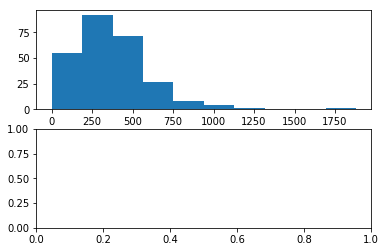

In [41]:
f, (ax1, ax2) = plt.subplots(2) # if only 1 argument, we assume it's the number of rows
ax1.hist(menu['Calories'])
plt.show()

Now let's fill in both subplots:

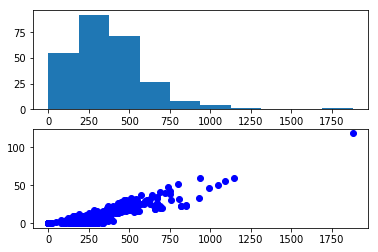

In [166]:
f, (ax1, ax2) = plt.subplots(2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Now let's make a 2x2 layout of 4 plots.  Note the structure of the return values from the subplots function:

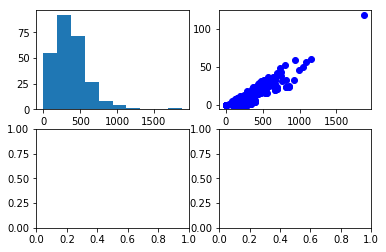

In [167]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

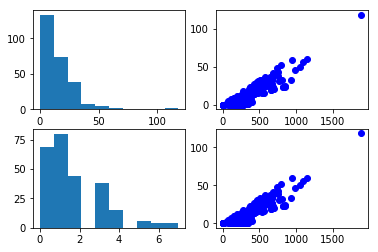

In [168]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Total Fat'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
ax3.hist(menu['Dietary Fiber'])
ax4.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Alternatively, we can use the pandas-matplotlib integration.  Note the use of the ```ax=``` keyword arg.

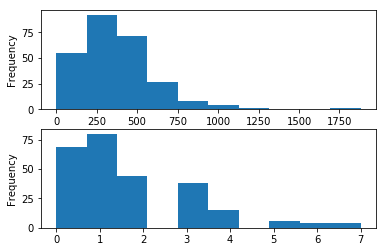

In [169]:
f, (ax1, ax2) = plt.subplots(2)
menu['Calories'].plot(ax=ax1, kind='hist')
menu['Dietary Fiber'].plot(ax = ax2,kind='hist')
plt.show()

### <font color="magenta">Q5 (2 points): Use subplots() to create a figure consisting of 4 plots.
    They could be scatter plots, histograms, bar charts, pie plots, or any of the kinds (repeated here for your convenience):
    
    kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

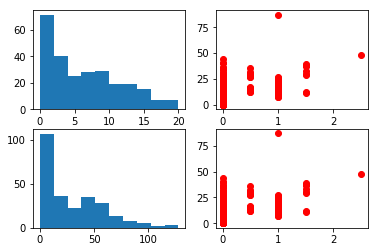

In [53]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Saturated Fat'])
ax2.plot(menu['Trans Fat'],menu['Protein'],'ro')
ax3.hist(menu['Sugars'])
ax4.plot(menu['Trans Fat'],menu['Protein'],'ro')
plt.show()

### xkcd style plots (just for fun)

Note that we can scope the use of any ```plt.``` function by using a ```with``` statement.

Note also that we can save a figure as a file by using ```savefig(...)``` (as shown below).

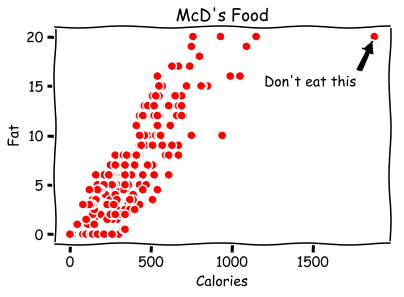

In [171]:
with plt.xkcd():
        # This figure will be in XKCD-style
        plt.plot(menu["Calories"],menu["Saturated Fat"],'ro')
        plt.title("McD's Food")
        plt.xlabel('Calories')
        plt.ylabel('Fat')
        plt.annotate("Don't eat this",xytext=(1200,15),xy=(1880,20),arrowprops=dict(facecolor='black', shrink=0.1))
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        plt.show()

### <font color="magenta">Q6 (2 points): Create an xkcd-style plot of any of the previous plots you created.  Make sure you annotate it with at least one interesting feature.  </font>
**Share your saved figure on the Slack #general channel**.

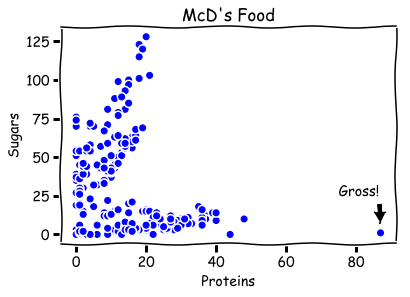

In [60]:
with plt.xkcd():
        # This figure will be in XKCD-style
        plt.plot(menu["Protein"],menu["Sugars"],'bo')
        plt.title("McD's Food")
        plt.xlabel('Proteins')
        plt.ylabel('Sugars')
        plt.annotate("Gross!",xytext=(75,25),xy=(87,5),arrowprops=dict(facecolor='black', shrink=0.1))
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        plt.show()

# <font color="magenta">END OF NOTEBOOK</font>
## Remember to submit this file in HTML and IPYNB formats via Canvas.